In [1]:
# Get the truth
## 1. Load the xi_Grid
import importlib
from gal_goku import plot
importlib.reload(plot)
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
train_subdir = 'train_less_massive'

plot_xi_emu = plot.PlotXiEmu(data_dir=data_dir, train_subdir=train_subdir)

2025-08-13 16:04:23.711377: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-13 16:04:23.714403: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-13 16:04:23.724104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755119063.740771 1164270 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755119063.745645 1164270 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755119063.758422 1164270 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Using 10 cores for parallel processing


2025-08-13 16:04:27.261698: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-13 16:04:27.405558: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-13 16:04:27.560827: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-13 16:04:27.701897: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-13 16:04:27.897421: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-13 16:04:28.085868: E external/local_xla/xla/stream_executor/cuda/cuda_platfo

In [2]:
## 2. Load hmf
# Get the truth
## 1. Load the xi_Grid
import importlib
from gal_goku import plot
importlib.reload(plot)
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/'
train_subdir = 'HMF/train_real_err'
num_inducing = 500
num_latents = 20

plot_hmf_emu = plot.HmfCombined(data_dir=data_dir, train_subdir=train_subdir, num_inducing=num_inducing, num_latents=num_latents)

summary_stats | 08/13/2025 04:05:29 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 08/13/2025 04:05:29 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 08/13/2025 04:05:29 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 08/13/2025 04:05:29 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 08/13/2025 04:05:29 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 08/13/2025 04:05:29 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 08/13/2025 04:05:29 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 08/13/2025 04:05:29 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 08/13/2025 04:05:29 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 08/13/2025 04:05:29 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_mer

08/13/2025 04:05:30 PM Using 10 cores for parallel prediction
08/13/2025 04:05:30 PM Using 10 cores for parallel prediction
2025-08-13 16:05:30.225879: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-13 16:05:30.259449: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-13 16:05:30.268611: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-13 16:05:30.275102: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-13 16:05:30.286255: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Fail

In [10]:
## 2. Set the true p_grid
import numpy as np
import os
from multiprocessing import Pool
from gal_goku import gal
importlib.reload(gal)
from scipy.interpolate import make_interp_spline


def truth(s):
    """
    Get the truth for sim s
    """
    g = gal.Gal(logging_level='ERROR')
    g.reset_hod()
    g.tag_info = f'truth {s}'
    # Reser cosmo
    g.hmf = plot_hmf_emu.truth[s].squeeze()
    ind = np.where(np.isfinite(g.hmf))
    g.hmf = g.hmf[ind]
    g.log_dndlog_m_spl = make_interp_spline(np.log10(plot_hmf_emu.mbins)[ind], g.hmf)
    g.xi_grid = plot_xi_emu.truth[s].squeeze()[:,:, g.xi_emu_r_mask]
    # make the p_grid
    g.k, g.p_grid = g.xi_grid_to_p_grid()
    g.xi_hh_mth_bspline = None
    g.p_hh_mth_bspline = None
    return g

def pred(s):
    """
    Get the prediction for sim s
    """
    g = gal.Gal(logging_level='ERROR')
    g.reset_hod()
    g.tag_info = f'pred {s}'
    # Reser cosmo
    g.hmf = plot_hmf_emu.pred[s].squeeze()
    ind = np.where(np.isfinite(g.hmf))
    g.hmf = g.hmf[ind]
    g.log_dndlog_m_spl = make_interp_spline(np.log10(plot_hmf_emu.mbins)[ind], g.hmf)
    g.xi_grid = plot_xi_emu.pred[s].squeeze()[:,:,g.xi_emu_r_mask]
    # make the p_grid
    g.k, g.p_grid = g.xi_grid_to_p_grid()
    g.xi_hh_mth_bspline = None
    g.p_hh_mth_bspline = None
    return g


def _compare_pred_truth_xi_gg(s):
    """
    Compare the prediction and truth for xi_gg
    """
    g_truth = truth(s)
    g_pred = pred(s)
    r, xi_gg_truth = g_truth.get_xi_gg()
    _, xi_gg_pred = g_pred.get_xi_gg()
    return  r, xi_gg_truth, xi_gg_pred

def compare_pred_truth_xi_gg():
    """
    Compare the prediction and truth for xi_gg
    """
    sims = np.arange(36)
    sims = np.delete(sims, [18])
    sim_tags = np.delete(plot_xi_emu.sim_tags, [6, 10, 13, 16, 18])
    # Determine the number of cores to use (leave some cores free)
    num_cores = max(1, os.cpu_count() - 2)
    print(f"Using {num_cores} cores for parallel processing")
    with Pool(num_cores) as p:
        results = p.map(_compare_pred_truth_xi_gg, sims)
    r = results[0][0]
    xi_gg_truth = np.array([result[1] for result in results])
    xi_gg_pred = np.array([result[2] for result in results])
    return r, xi_gg_truth, xi_gg_pred, sim_tags


In [ ]:
r, all_xi_gg_truth, all_xi_gg_pred, sim_tags = compare_pred_truth_xi_gg()

Using 10 cores for parallel processing


In [4]:
import numpy as np
# params of interest
indp = [0, 2, 3, 4]
dist = np.abs(plot_xi_emu.dist_planck)
print(dist.shape)
ind_sims = np.arange(dist.shape[0])
outlier_sims = []
for p in indp:
    percent = np.percentile(dist[:,p], [80])
    ind_above = np.where(dist[:,p] >= percent[0])
    print(f"Parameter {list(plot_xi_emu.latex_labels.keys())[p]}: {len(ind_above[0])} simulations above 80th percentile of {percent}, sims= {ind_above}")
    print(dist[ind_above, p])
    outlier_sims.extend(ind_above)
outlier_sims = np.unique(np.array(outlier_sims))
remaining_sims = np.setdiff1d(ind_sims, outlier_sims)
print(f"Total number of outlier simulations: {len(outlier_sims)}")
print(f'outlier_sims: {outlier_sims}')


(36, 10)
Parameter omega0: 8 simulations above 80th percentile of [11.06071429], sims= (array([ 0,  5,  6, 11, 14, 17, 18, 20]),)
[[11.06071429 12.125      14.275      12.89642857 14.31071429 12.16785714
  15.94642857 11.69642857]]
Parameter hubble: 8 simulations above 80th percentile of [12.62563323], sims= (array([ 5,  7, 10, 16, 18, 19, 29, 32]),)
[[13.53968254 17.75555556 13.69206349 16.02857143 14.35238095 16.12380952
  14.22982101 12.62563323]]
Parameter scalar_amp: 8 simulations above 80th percentile of [18.12222222], sims= (array([ 0,  1,  5,  9, 10, 12, 16, 20]),)
[[29.52222222 35.01111111 18.94444444 28.36666667 18.12222222 25.5
  21.94444444 24.25555556]]
Parameter ns: 8 simulations above 80th percentile of [26.13157895], sims= (array([ 1,  2,  3,  6,  7, 13, 15, 20]),)
[[28.97368421 43.55263158 28.23684211 34.81578947 26.13157895 29.55263158
  42.60526316 36.18421053]]
Total number of outlier simulations: 21
outlier_sims: [ 0  1  2  3  5  6  7  9 10 11 12 13 14 15 16 17 18 

In [5]:
# The truth for sim 522 is very bad, we don't use that.
bad_sims =  np.array([18])
print(outlier_sims, remaining_sims)
outlier_sims_new = np.array([s for s in outlier_sims if s not in bad_sims])
remaining_sims_new = np.array([s for s in remaining_sims if s not in bad_sims])
print(outlier_sims_new, remaining_sims_new)
def shift_indices(indices, bad):
    bad = np.sort(bad)
    return np.array([i - np.sum(bad <= i) for i in indices])

outlier_sims = shift_indices(outlier_sims_new, bad_sims)
remaining_sims = shift_indices(remaining_sims_new, bad_sims)

print(outlier_sims, remaining_sims)

[ 0  1  2  3  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 29 32] [ 4  8 21 22 23 24 25 26 27 28 30 31 33 34 35]
[ 0  1  2  3  5  6  7  9 10 11 12 13 14 15 16 17 19 20 29 32] [ 4  8 21 22 23 24 25 26 27 28 30 31 33 34 35]
[ 0  1  2  3  5  6  7  9 10 11 12 13 14 15 16 17 18 19 28 31] [ 4  8 20 21 22 23 24 25 26 27 29 30 32 33 34]


In [6]:
errs = np.abs(all_xi_gg_pred / all_xi_gg_truth - 1)
np.unique(np.where(errs> 1)[0])

NameError: name 'all_xi_gg_pred' is not defined

In [17]:
sim_tags[[0, 10]]

array(['compressed_10p_Box1000_Part3000_0024',
       'compressed_10p_Box1000_Part3000_0240'], dtype='<U43')

In [265]:
failing_sims = [0, 10]
remaining_sims = np.setdiff1d(remaining_sims, failing_sims)
print(f"Remaining sims after removing failing sims: {remaining_sims}")

outlier_sims = np.setdiff1d(outlier_sims, failing_sims)
print(f"Outlier sims after removing failing sims: {outlier_sims}")

Remaining sims after removing failing sims: [ 4  7 16 17 18 19 20 21 22 23 25 26 28 29 30]
Outlier sims after removing failing sims: [ 1  2  3  5  6  8  9 11 12 13 14 15 24 27]


2 from 31 simulations have catasrophic error, so I have removed 8 in total.

Median error for Widesims:
0.10926749074601894
Median error for Narrow sims:
0.06686898428637733


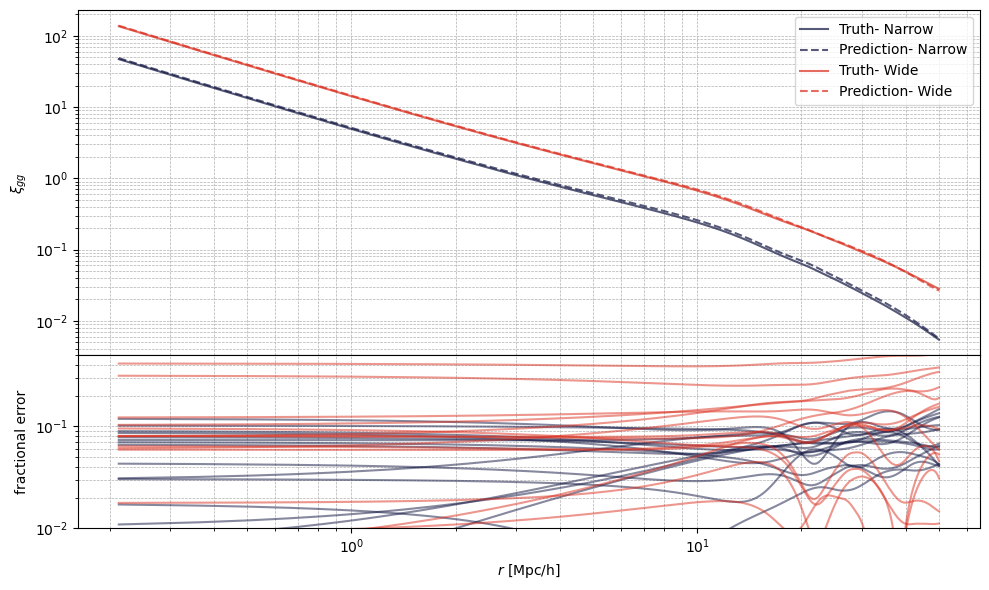

In [260]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [2, 1]})


percentile_to_use = [0, 16, 50, 68, 100]

color1 = "#0f133f"
color2 = "#db2e1e"


sim_rand_narrow = np.random.choice(remaining_sims, size=1, replace=False)[0]
sim_rand_wide = np.random.choice(outlier_sims, size=1, replace=False)[0]

ax[0].plot(r, all_xi_gg_truth[sim_rand_narrow], label=f'Truth- Narrow', alpha=0.7, color=color1)
ax[0].plot(r, all_xi_gg_pred[sim_rand_narrow], label=f'Prediction- Narrow', ls='--', alpha=0.7, color=color1)

ax[0].plot(r, all_xi_gg_truth[sim_rand_wide], label=f'Truth- Wide', alpha=0.7, color=color2)
ax[0].plot(r, all_xi_gg_pred[sim_rand_wide], label=f'Prediction- Wide', ls='--', alpha=0.7, color=color2)

ax[0].legend(loc='upper right', fontsize=10)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\xi_{gg}$')
ax[0].grid(which='both', linestyle='--', linewidth=0.5)
#ax[0].legend(loc='upper right', fontsize=10)


errs = np.abs(all_xi_gg_pred / all_xi_gg_truth - 1)

# Narrow-prior
for c, i in enumerate(remaining_sims):
    if c ==0:
        label = f'Narrow-prior, sims {len(remaining_sims)}'
    else:
        label = None
    ax[1].plot(r, errs[i], label=label, color=color1, alpha=0.5)

#percentile_err = np.percentile(errs[remaining_sims], percentile_to_use, axis=0)
#ax[1].fill_between(r, percentile_err[1], percentile_err[3], color=color1, alpha=0.2)

# wide-prior
for c, i in enumerate(outlier_sims):
    if c == 0:
        label = f'Wide-prior, sims {len(outlier_sims)}'
    else:
        label = None
    ax[1].plot(r, errs[i], label=label, color=color2, alpha=0.5)

#percentile_err = np.percentile(errs[outlier_sims], percentile_to_use, axis=0)
#ax[1].fill_between(r, percentile_err[1], percentile_err[3], color=color2, alpha=0.2)


#ax.grid()
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$r$ [Mpc/h]')
ax[1].set_ylabel(f'fractional error')
ax[1].set_yscale('log')
ax[1].set_ylim(0.01, 0.5)
ax[1].grid(which='both', linestyle='--', linewidth=0.5)
#ax[1].legend(loc='upper left', fontsize=10)
fig.tight_layout()

print(f'Median error for Widesims:')
print(np.median(errs[outlier_sims]))
print(f'Median error for Narrow sims:')
print(np.median(errs[remaining_sims]))

#fig.savefig('/home/qezlou/HD2/HETDEX/draft/gal-emu-paper/figures/xi_gg_loocv.pdf')


Median error for Widesims:
0.09729533383720984
Median error for Narrow sims:
0.06686898428637733


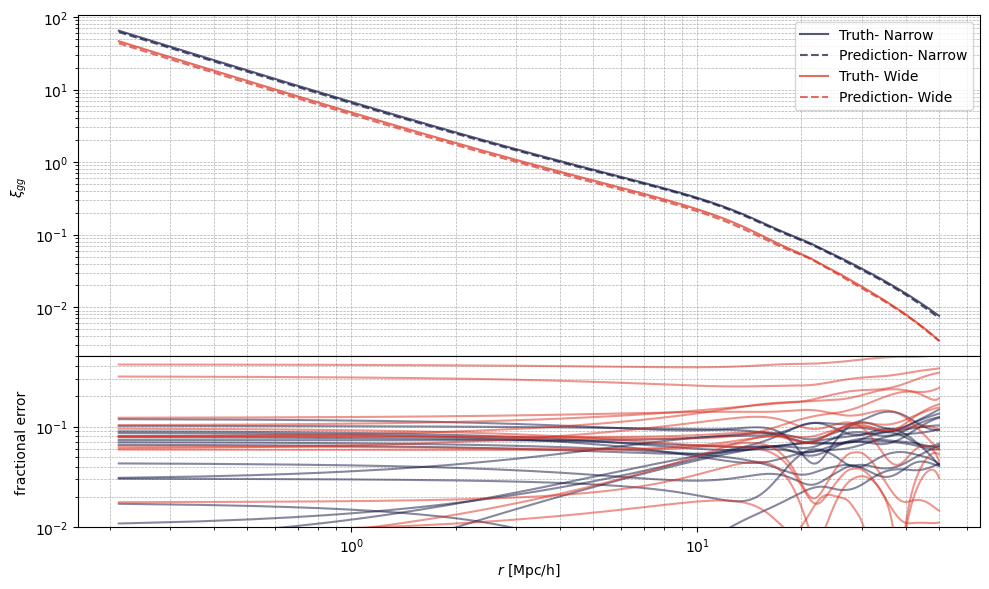

In [269]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [2, 1]})


percentile_to_use = [0, 16, 50, 68, 100]

color1 = "#0f133f"
color2 = "#db2e1e"


sim_rand_narrow = np.random.choice(remaining_sims, size=1, replace=False)[0]
sim_rand_wide = np.random.choice(outlier_sims, size=1, replace=False)[0]

ax[0].plot(r, all_xi_gg_truth[sim_rand_narrow], label=f'Truth- Narrow', alpha=0.7, color=color1)
ax[0].plot(r, all_xi_gg_pred[sim_rand_narrow], label=f'Prediction- Narrow', ls='--', alpha=0.7, color=color1)

ax[0].plot(r, all_xi_gg_truth[sim_rand_wide], label=f'Truth- Wide', alpha=0.7, color=color2)
ax[0].plot(r, all_xi_gg_pred[sim_rand_wide], label=f'Prediction- Wide', ls='--', alpha=0.7, color=color2)

ax[0].legend(loc='upper right', fontsize=10)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\xi_{gg}$')
ax[0].grid(which='both', linestyle='--', linewidth=0.5)
#ax[0].legend(loc='upper right', fontsize=10)


errs = np.abs(all_xi_gg_pred / all_xi_gg_truth - 1)

# Narrow-prior
for c, i in enumerate(remaining_sims):
    if c ==0:
        label = f'Narrow-prior, sims {len(remaining_sims)}'
    else:
        label = None
    ax[1].plot(r, errs[i], label=label, color=color1, alpha=0.5)

#percentile_err = np.percentile(errs[remaining_sims], percentile_to_use, axis=0)
#ax[1].fill_between(r, percentile_err[1], percentile_err[3], color=color1, alpha=0.2)

# wide-prior
for c, i in enumerate(outlier_sims):
    if c == 0:
        label = f'Wide-prior, sims {len(outlier_sims)}'
    else:
        label = None
    ax[1].plot(r, errs[i], label=label, color=color2, alpha=0.5)

#percentile_err = np.percentile(errs[outlier_sims], percentile_to_use, axis=0)
#ax[1].fill_between(r, percentile_err[1], percentile_err[3], color=color2, alpha=0.2)


#ax.grid()
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$r$ [Mpc/h]')
ax[1].set_ylabel(f'fractional error')
ax[1].set_yscale('log')
ax[1].set_ylim(0.01, 0.5)
ax[1].grid(which='both', linestyle='--', linewidth=0.5)
#ax[1].legend(loc='upper left', fontsize=10)
fig.tight_layout()

print(f'Median error for Widesims:')
print(np.median(errs[outlier_sims]))
print(f'Median error for Narrow sims:')
print(np.median(errs[remaining_sims]))

#fig.savefig('/home/qezlou/HD2/HETDEX/draft/gal-emu-paper/figures/xi_gg_loocv.pdf')


Sim counts. Narrow sims: 15, Wide sims: 16
Median error for Widesims:
0.10926749074601894
Median error for Narrow sims:
0.06686898428637733


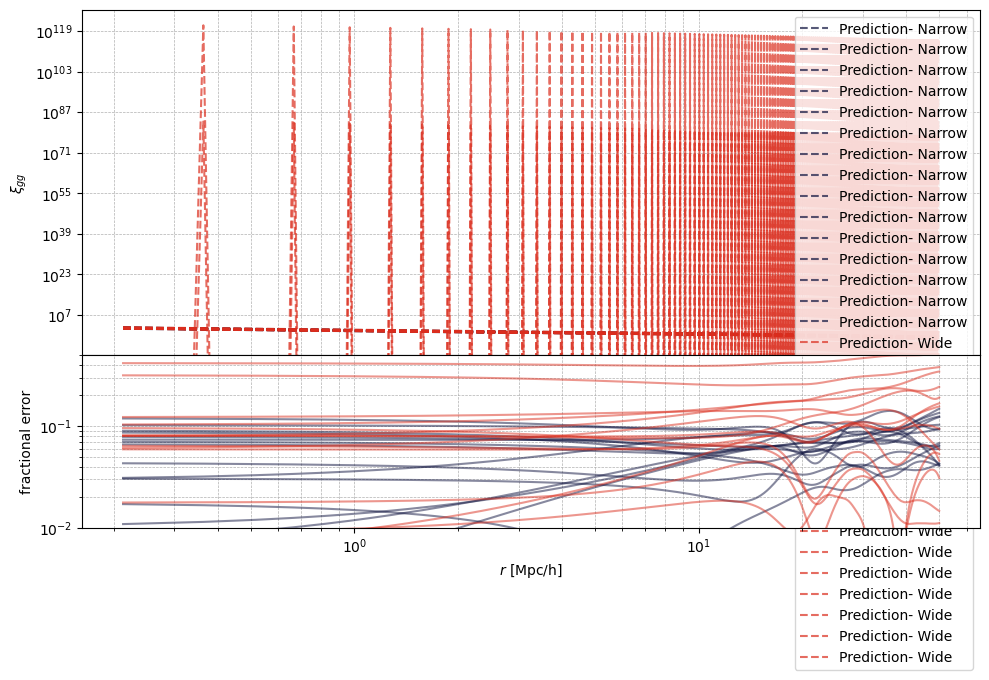

In [287]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [2, 1]})


percentile_to_use = [0, 16, 50, 68, 100]

color1 = "#0f133f"
color2 = "#db2e1e"



print(f'Sim counts. Narrow sims: {len(remaining_sims)}, Wide sims: {len(outlier_sims)}')
for i in remaining_sims:
    #ax[0].plot(r, all_xi_gg_truth[i], label=f'Truth- Narrow', alpha=0.4, color=color1)
    ax[0].plot(r, all_xi_gg_pred[i], label=f'Prediction- Narrow', ls='--', alpha=0.7, color=color1)
for i in outlier_sims:
    #ax[0].plot(r, all_xi_gg_truth[i], label=f'Truth- Wide', alpha=0.4, color=color2)
    ax[0].plot(r, all_xi_gg_pred[i], label=f'Prediction- Wide', ls='--', alpha=0.7, color=color2)


ax[0].legend(loc='upper right', fontsize=10)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\xi_{gg}$')
ax[0].grid(which='both', linestyle='--', linewidth=0.5)
#ax[0].legend(loc='upper right', fontsize=10)


errs = np.abs(all_xi_gg_pred / all_xi_gg_truth - 1)

# Narrow-prior
for c, i in enumerate(remaining_sims):
    if c ==0:
        label = f'Narrow-prior, sims {len(remaining_sims)}'
    else:
        label = None
    ax[1].plot(r, errs[i], label=label, color=color1, alpha=0.5)

#percentile_err = np.percentile(errs[remaining_sims], percentile_to_use, axis=0)
#ax[1].fill_between(r, percentile_err[1], percentile_err[3], color=color1, alpha=0.2)

# wide-prior
for c, i in enumerate(outlier_sims):
    if c == 0:
        label = f'Wide-prior, sims {len(outlier_sims)}'
    else:
        label = None
    ax[1].plot(r, errs[i], label=label, color=color2, alpha=0.5)

#percentile_err = np.percentile(errs[outlier_sims], percentile_to_use, axis=0)
#ax[1].fill_between(r, percentile_err[1], percentile_err[3], color=color2, alpha=0.2)


#ax.grid()
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$r$ [Mpc/h]')
ax[1].set_ylabel(f'fractional error')
ax[1].set_yscale('log')
ax[1].set_ylim(0.01, 0.5)
ax[1].grid(which='both', linestyle='--', linewidth=0.5)
#ax[1].legend(loc='upper left', fontsize=10)
fig.tight_layout()

print(f'Median error for Widesims:')
print(np.median(errs[outlier_sims]))
print(f'Median error for Narrow sims:')
print(np.median(errs[remaining_sims]))



## inverstimage bad ones:

In [273]:
plot_xi_emu.sim_tags[[6, 10, 13, 16, 18]]

array(['compressed_10p_Box1000_Part3000_0072',
       'compressed_10p_Box1000_Part3000_0208',
       'compressed_10p_Box1000_Part3000_0241',
       'compressed_10p_Box1000_Part3000_0301',
       'compressed_10p_Box1000_Part3000_0522'], dtype='<U43')

In [6]:
import numpy as np
np.where(plot_xi_emu.sim_tags == 'compressed_10p_Box1000_Part3000_0024'), np.where(plot_xi_emu.sim_tags == 'compressed_10p_Box1000_Part3000_0240') 

((array([0]),), (array([12]),))

2025-08-13 15:58:13.086186: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


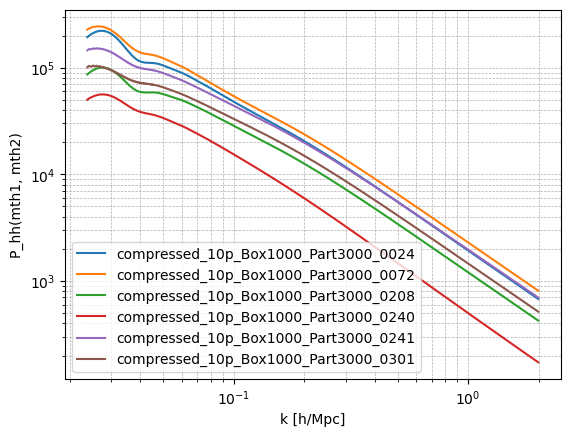

In [7]:
## 2. Set the true p_grid
import numpy as np
from matplotlib import pyplot as plt
import os
from gal_goku import gal
importlib.reload(gal)
from scipy.interpolate import make_interp_spline


def truth(s):
    """
    Get the truth for sim s
    """
    g = gal.Gal(logging_level='ERROR')
    g.reset_hod()
    g.tag_info = f'truth {s}'
    # Reser cosmo
    g.hmf = plot_hmf_emu.truth[s].squeeze()
    ind = np.where(np.isfinite(g.hmf))
    g.hmf = g.hmf[ind]
    g.log_dndlog_m_spl = make_interp_spline(np.log10(plot_hmf_emu.mbins)[ind], g.hmf)
    g.xi_grid = plot_xi_emu.truth[s].squeeze()[:,:, g.xi_emu_r_mask]
    # make the p_grid
    g.k, g.p_grid = g.xi_grid_to_p_grid()
    g.xi_hh_mth_bspline = None
    g.p_hh_mth_bspline = None
    return g

plt.figure()
for sim in [0, 6, 10, 12, 13, 16]:#, 18]:
    t6 = truth(sim)
    plt.plot(t6.k, t6.p_grid[0, 0], label=f'{plot_xi_emu.sim_tags[sim]}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [h/Mpc]')
plt.ylabel('P_hh(mth1, mth2)')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()


In [100]:
import numpy as np
from scipy.interpolate import UnivariateSpline


def new_spline(x, y):
    N = len(x)

    # 1. Estimate noise level (robustly, using median absolute deviation)
    dy = np.diff(y)
    mad = np.median(np.abs(dy - np.median(dy)))
    sigma = 1.4826 * mad  # robust std estimate

    # 2. Compute recommended smoothing factor
    s_auto = (sigma**2) * N
    print(s_auto)

    # 3. First pass spline with automatic s
    spl0 = UnivariateSpline(x, y, k=3, s=s_auto)

    # 4. Residuals for adaptive weights
    resid = y - spl0(x)
    weights = 1 / (np.abs(resid) + sigma)  # downweight big outliers

    # 5. Final weighted smoothing spline
    spl = UnivariateSpline(x, y, k=3, s=s_auto, w=weights)

    return spl

In [143]:
t6.xi_emu.rbins

array([ 0.21268578,  0.26343238,  0.32628708,  0.40413884,  0.50056595,
        0.62000047,  0.76793194,  0.9511597 ,  1.17810543,  1.45920017,
        1.80736382,  2.27499553,  2.90060912,  3.69826365,  4.71526961,
        6.01194766,  7.66520638,  9.77310384, 12.46066368, 15.88729045,
       20.25622426, 25.82659532, 32.9287935 , 41.98406441, 53.52949432,
       60.52631579])

[2.36756263e+02 2.17966599e+02 3.98208182e+02 3.36878188e+02
 3.35252431e+02 2.65938543e+02 1.57791451e+02 8.13986848e+01
 4.23204225e+01 2.43148545e+01 1.32963650e+01 7.28772809e+00
 4.52953312e+00 2.65972945e+00 1.55991902e+00 9.08112764e-01
 5.96114553e-01 3.50815499e-01 2.00568990e-01 1.16383514e-01] [2.36756263e+02 2.17966599e+02 3.98208182e+02 3.36878188e+02
 3.35252431e+02 2.65938543e+02 1.57791451e+02 8.13986848e+01
 4.23204225e+01 2.43148545e+01 1.32963650e+01 7.28772809e+00
 4.52953312e+00 2.65972945e+00 1.55991902e+00 9.08112764e-01
 5.96114553e-01 3.50815499e-01 2.00568990e-01 1.16383514e-01]


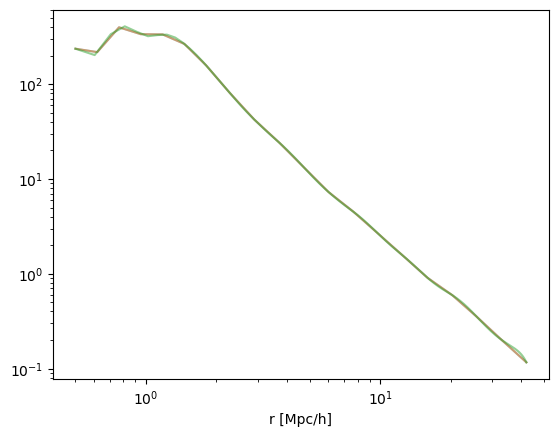

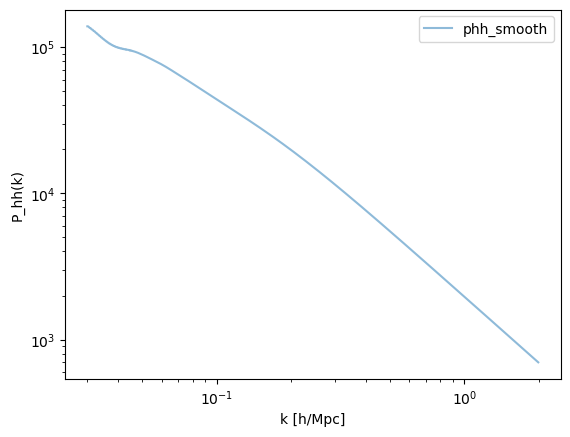

In [169]:

from matplotlib import pyplot as plt
import mcfit

sim = 13
t6 = truth(sim, deltam=0.01)
ind = 0
ind_rbin = (t6.xi_emu.rbins <= 50)*(t6.xi_emu.rbins >= 0.5)
xi_grid = t6.xi_grid[ind, ind, ind_rbin]
rbins = t6.xi_emu.rbins[ind_rbin]
rbins_fine = np.linspace(rbins[0], rbins[-1], 400)

plt.plot(rbins, xi_grid, label='p_grid', alpha=0.5)
# Only keep bins where relative change is less than 10%
#rel_change = np.abs(np.diff(xi_grid) / xi_grid[:-1])
#good_bins = np.where(rel_change < 1)[0]
# Since np.diff returns N-1 elements, we keep bins up to good_bins+1
xi_grid_spline = UnivariateSpline(rbins, xi_grid, k=3, s=0)
xi_grid_smooth = xi_grid_spline(rbins)
xi_grid_smooth_fine = xi_grid_spline(rbins_fine)

plt.plot(rbins, xi_grid_smooth, label='p_grid_smooth', alpha=0.5)
plt.plot(rbins_fine, xi_grid_smooth_fine, label='p_grid_smooth_fine', alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('r [Mpc/h]')
print(xi_grid, xi_grid_smooth)

k, phh_smooth = mcfit.xi2P(rbins_fine, l=0, lowring=True)(xi_grid_smooth_fine, extrap=True)
plt.figure()
ind_k = k > 0.03
plt.plot(k[ind_k], phh_smooth[ind_k], label='phh_smooth', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [h/Mpc]')
plt.ylabel('P_hh(k)')
plt.legend()
plt.show()